In [12]:
# Import libraries
import pandas as pd

# DataSet

In [63]:
# Chargement dataset

# Article Dataset
articles_df = pd.read_csv('./data/articles.csv')
articles_df['article_id'] = pd.to_numeric(articles_df['article_id'])

# Customer Dataset
customers_df = pd.read_csv('./data/customers.csv')

# Transaction dataset
transactions_df = pd.read_csv('./data/transactions_train.csv')
transactions_df['article_id'] = pd.to_numeric(transactions_df['article_id'])

In [64]:
from helpers import read_df_metadata

df_articles_types = read_df_metadata(articles_df)
nb_articles = articles_df.shape[0]
nb_articles_with_null_article_id = articles_df['article_id'].isnull().sum()

print('Article DataSet Exploration')
print('--'*50)
print(f'- Nb Articles {nb_articles}')
print(f'- Nb Article Duplicates, {articles_df['article_id'].duplicated().sum()}')
print(df_articles_types)
print(articles_df.head())



Article DataSet Exploration
----------------------------------------------------------------------------------------------------
- Nb Articles 105542
- Nb Article Duplicates, 0
                         colonne     type
0                     article_id  numeric
1                   product_code  numeric
2                      prod_name     char
3                product_type_no  numeric
4              product_type_name     char
5             product_group_name     char
6        graphical_appearance_no  numeric
7      graphical_appearance_name     char
8              colour_group_code  numeric
9              colour_group_name     char
10     perceived_colour_value_id  numeric
11   perceived_colour_value_name     char
12    perceived_colour_master_id  numeric
13  perceived_colour_master_name     char
14                 department_no  numeric
15               department_name     char
16                    index_code     char
17                    index_name     char
18                index_g

In [65]:
from helpers import read_df_metadata

df_customers_types = read_df_metadata(customers_df)
nb_customers = customers_df.shape[0]

print('Customer DataSet Exploration')
print('--'*50)
print(f'- Nb Customer {nb_customers}')
print(f'- Nb Article Duplicates, {customers_df['customer_id'].duplicated().sum()}')

print(df_customers_types)
print(customers_df.head())

Customer DataSet Exploration
----------------------------------------------------------------------------------------------------
- Nb Customer 1371980
- Nb Article Duplicates, 0
                  colonne     type
0             customer_id     char
1                      FN  numeric
2                  Active  numeric
3      club_member_status     char
4  fashion_news_frequency     char
5                     age  numeric
6             postal_code     char
                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE

In [66]:
from helpers import read_df_metadata

df_transactions_types = read_df_metadata(transactions_df)
nb_transactions = transactions_df.shape[0]
nb_transactions_with_null_article_id = transactions_df['article_id'].isnull().sum()


print('Transactions DataSet Exploration')
print('--'*50)
print(f'- Nb Transactions {nb_transactions}')
print(f'- Nb Transactions with null article id {nb_transactions_with_null_article_id}')


print(df_transactions_types)
print(transactions_df.head())

transactions_df['article_id'] = pd.to_numeric(transactions_df['article_id'])



Transactions DataSet Exploration
----------------------------------------------------------------------------------------------------
- Nb Transactions 31788324
- Nb Transactions with null article id 0
            colonne     type
0             t_dat     char
1       customer_id     char
2        article_id  numeric
3             price  numeric
4  sales_channel_id  numeric
        t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932    

In [67]:
# DataSet - Join sur les trois dataset

merged_df = transactions_df.merge(articles_df, on='article_id', how='inner')

print('--'*50)
print(f'Nb all df merged lignes {merged_df.shape[0]}')



----------------------------------------------------------------------------------------------------
Nb all df merged lignes 31788324


In [68]:
print(f'{merged_df.shape[0]} - Nb all df merged lignes ')
print(f'{nb_transactions} - Nb Transactions ')
print(f'{nb_customers} - Nb Customer ')
print(f'{nb_articles} - Nb Articles')

31788324 - Nb all df merged lignes 
31788324 - Nb Transactions 
1371980 - Nb Customer 
105542 - Nb Articles


# Echantillonage

On echatillonne par:
- Nb transactions pas article
- Nb transactions par customer, attention au revendeur. On ne fait > 100 mais Appartient a [100,500]
- Nb transactions par catégories, on affiche le nombre d vente par catégories et on elague

In [77]:
k_article = 1000
k_customer = 100


def enchantillonner(df, column_name, k):

    column_counts = df[column_name].value_counts()
    columns_valid = column_counts[column_counts >= k].index
    df_filtered = df[df[column_name].isin(columns_valid)]
    return df_filtered

echantillon_df = enchantillonner(merged_df, 'article_id', k_article) 
print(echantillon_df.shape)   

echantillon_df = enchantillonner(merged_df, 'customer_id', k_customer) 
print(echantillon_df.shape)  


(16959508, 29)
(9413225, 29)


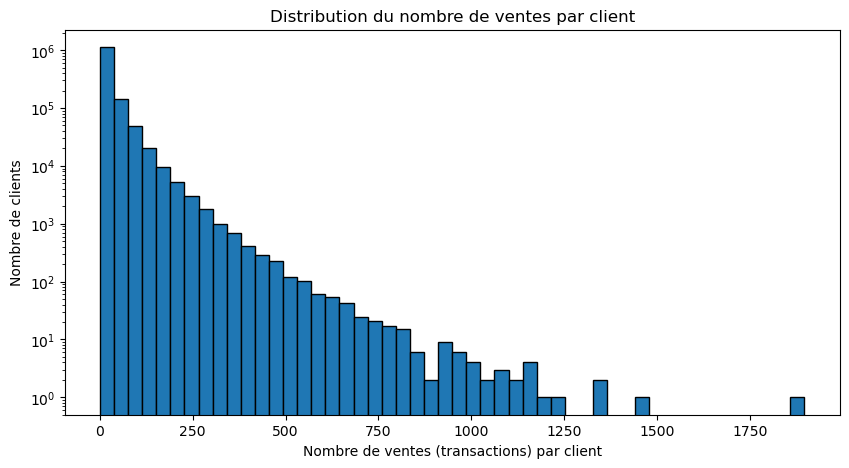

In [80]:
import matplotlib.pyplot as plt

# On suppose que ton DataFrame s'appelle df et la colonne client est 'customer_id'
ventes_par_client = merged_df['customer_id'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(ventes_par_client, bins=50, edgecolor='black')
plt.title('Distribution du nombre de ventes par client')
plt.xlabel('Nombre de ventes (transactions) par client')
plt.ylabel('Nombre de clients')
plt.yscale('log')  # souvent utile pour voir la distribution sur de grands volumes
plt.show()